In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [11]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 200


In [12]:
def get_lattice(filename):
    with open(filename, "r") as f:
        w, h, E = f.readline().split(" ")
        w = int(w)
        h = int(h)
        E = float(E)
        lattice = []
        for i in range(w*h):
            x, y, z = f.readline().split(" ")
            x = float(x)
            y = float(y)
            z = float(z)
            lattice.append([x, y, z])
    return np.reshape(np.array(lattice), (w, h, 3)), E


In [13]:
filename = "magsim/lattice.dump0"
lattice, E = get_lattice(filename)

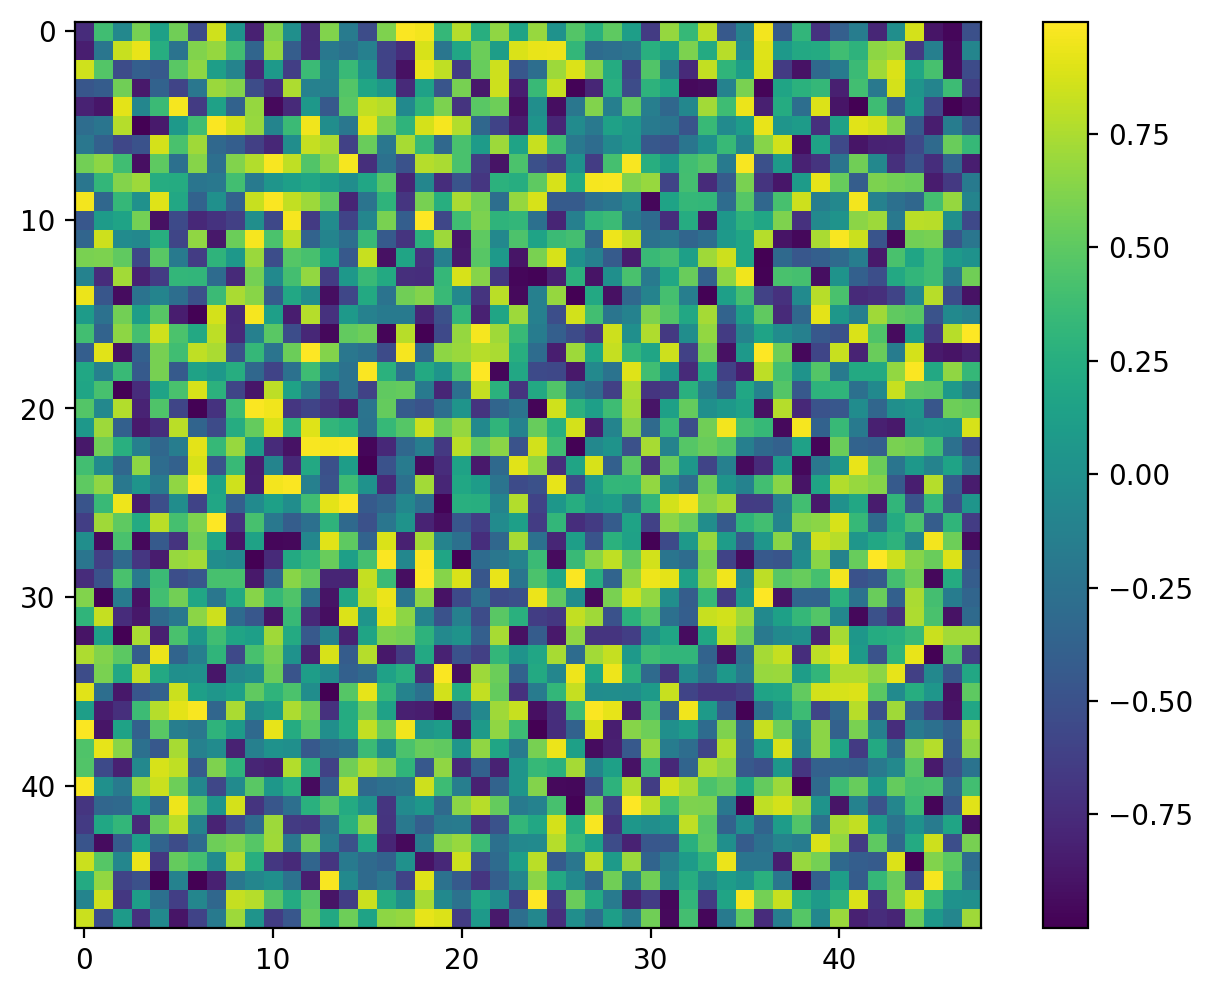

In [14]:
plt.imshow(lattice[:,:,2])
plt.colorbar()

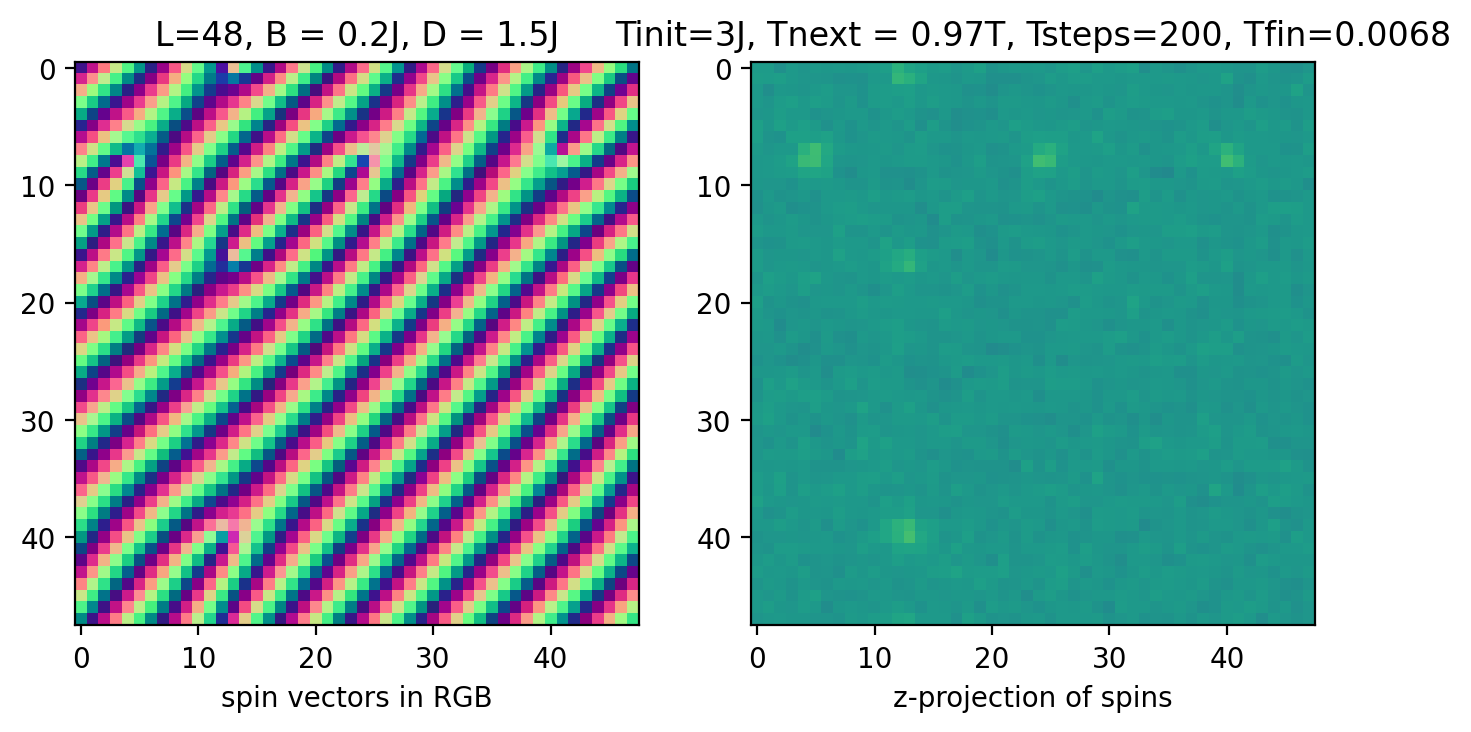

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
im1 = ax1.imshow((lattice+1)/2)
im2 = ax2.imshow(lattice[:,:,2])

ax1.set_title("L=48, B = 0.2J, D = 1.5J")
ax2.set_title("Tinit=3J, Tnext = 0.97T, Tsteps=200, Tfin=0.0068")
ax1.set_xlabel("spin vectors in RGB")
ax2.set_xlabel("z-projection of spins")
# animation function.  This is called sequentially
def animate(i):
    lattice, E = get_lattice("magsim/lattice.dump" + str(i))
    im1.set_array((lattice+1)/2)
    im2.set_array(lattice[:,:,2])
#     Ecum.append(E)
#     ax2.plot(Ecum)

anim = animation.FuncAnimation(fig, animate,
                               frames=199, interval=100)

# HTML(anim.to_jshtml())
HTML(anim.to_html5_video())

# plt.show()

In [ ]:
mywriter = animation.FFMpegWriter()
anim.save('mymovie.mp4',writer=mywriter)